In [2]:
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np

In [29]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

## Data understanding
### Train dataset

The dataset contains 785 columns in total; 784 of them being pixel values; 1 label

Total of 42000 entries - No missing values

### Test dataset

The dataset contains 784 columns in total; 784 of them being pixel values

Total of 785 entries - No missing values

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [30]:
print('Any missing values is the train_df: ' + str(train_df.isnull().values.any()))
print('Any missing values is the test_df: ' + str(test_df.isnull().values.any()))

Any missing values is the train_df: False
Any missing values is the test_df: False


In [31]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
test_df.shape

(28000, 784)

## Separating targets and features

`X_train` contains the features: all 784 pixels from the images in an array

`Y_train` contains the targets: the numerical labels from 1-9

In [33]:
Y_train = train_df["label"]
X_train = train_df.drop(labels = ["label"],axis = 1)

In [36]:
print('Range of values for the X_train: ' + str(X_train.min().min()) + '-' + str(X_train.max().max()))
print('Range of values for the test_df: ' + str(test_df.min().min()) + '-' + str(test_df.max().max()))

Range of values for the X_train: 0-255
Range of values for the test_df: 0-255


## Distribution

Data is more or less evenly distributed. Category 5 contains some 1000 elements less than Category 1 but it's still quite a lot of training examples.

In [9]:
Y_train.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

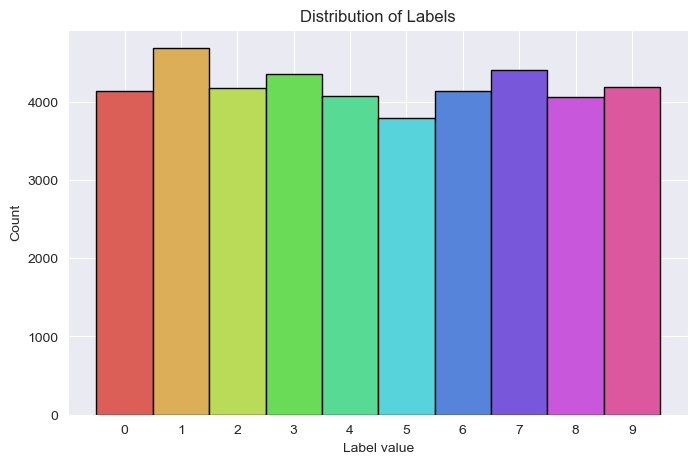

In [12]:
# Define bins for labels 0-9
bins = np.arange(-0.5, 10.5, 1)

plt.figure(figsize=(8, 5))
counts, bins, patches = plt.hist(Y_train, bins=bins, edgecolor='black')
colors = sns.color_palette("hls", 10)
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

plt.xlabel('Label value')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks(range(10))
plt.show()


## Data preparation

1. Transform our data from 0-255 pixel value to 0-1 pixel value
2. Transform our labels from numerical values to one-hot encoded values

In [37]:
X_train = X_train / 255.0
test_df = test_df / 255.0

In [38]:
X_train.values.shape

(42000, 784)

In [39]:
Y_train = keras.utils.to_categorical(Y_train, num_classes=10)

In [40]:
Y_train[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Splitting our data

We use a 80/20 test split since there's quite a lot of data and we just want to learn on as much as possible. Random state of The One True Number so we can safely repeat the split.

In [41]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=42)

In [45]:
X_train = X_train.values
print(X_train.shape)
print(Y_train.shape)

(33600, 784)
(33600, 10)


## Images of our data

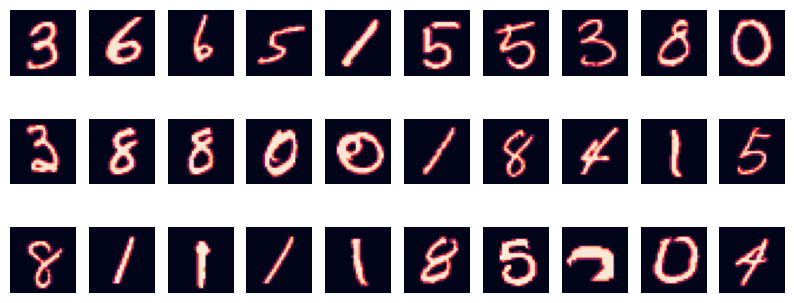

In [46]:
rs = np.random.RandomState(42)
random_indices = rs.choice(len(X_train), 30, replace=False)

plt.figure(figsize=(10, 4))
for pos, idx in enumerate(random_indices):
    plt.subplot(3, 10, pos + 1)
    plt.imshow(X_train[idx].reshape((28, 28)))
    plt.axis('off')
plt.show()


# Building our network

We use 3Blue1Brown's model here. Input layer of 784 neurons (1 per pixel), ReLu activation, then two layers of 16 neurons with ReLu activation and finally a SoftMax layer.

In [48]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Compiling the model

Adam optimizer is generally the best, but every year new ones come out so challenge it!

Loss and metrics are hopefully obvious.

In [49]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

Generally 5 epochs is enough to do better than most humans.

In [51]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, Y_val)
)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6977 - loss: 0.9733 - val_accuracy: 0.9048 - val_loss: 0.3301
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9126 - loss: 0.2938 - val_accuracy: 0.9194 - val_loss: 0.2807
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9283 - loss: 0.2495 - val_accuracy: 0.9250 - val_loss: 0.2658
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9329 - loss: 0.2288 - val_accuracy: 0.9318 - val_loss: 0.2405
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9407 - loss: 0.1981 - val_accuracy: 0.9376 - val_loss: 0.2202
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9480 - loss: 0.1757 - val_accuracy: 0.9401 - val_loss: 0.2116
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9536 - loss: 0.1570 - val_accuracy: 0.9417 - val_loss: 0.2012
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9577 - loss: 0.1471 - 

# The predictions

Unfortunately, the `predict` method just returns the SoftMax layers values, so we still need to retrieve the actual prediction from that. `np.argmax` does that: it retrieves the highest number from each array. Parameter `axis=1` makes it return the index from that array so actually get the number.

In [52]:
predictions = model.predict(test_df.values)

print(predictions[:5])

results = np.argmax(predictions ,axis = 1)

print(results[:5])

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[3.05146308e-08 1.57910472e-14 9.99996066e-01 3.78278423e-06
  1.15419111e-12 1.61344132e-10 3.55231209e-12 1.61077324e-07
  2.40942111e-08 1.84181712e-10]
 [9.99766052e-01 3.56240428e-12 3.45457966e-06 5.76425236e-07
  2.71734042e-11 2.29596757e-04 8.41805772e-08 5.73635628e-09
  2.33895392e-07 3.57474134e-10]
 [1.00843565e-04 1.78742062e-04 5.25028845e-05 1.53947016e-03
  8.62582773e-02 5.57088712e-03 3.03427747e-04 1.39087089e-03
  4.40178737e-02 8.60587180e-01]
 [5.55035239e-03 3.29421127e-05 1.75125733e-01 1.55311543e-03
  3.04770768e-01 1.48544065e-03 3.19555547e-05 3.90951157e-01
  2.35554809e-03 1.18142918e-01]
 [1.25693148e-07 1.02085804e-04 3.70362639e-01 6.28973782e-01
  8.75884434e-12 4.66798432e-04 4.34602683e-08 1.22710190e-07
  9.43511914e-05 2.38876089e-11]]
[2 0 9 7 3]


In [20]:
#my_submission = pd.DataFrame({'ImageId': list(range(1,len(results)+1)), 'label': results})

# you could use any filename. We choose submission here
#my_submission.to_csv('submission.csv', index=False)